<a href="https://colab.research.google.com/github/leaf7823/hosripo/blob/master/sample_HEADBOOST__(3_1_%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets #scikit-learnのデータセットモジュールのインポート
digits=datasets.load_digits() #手書き数字のデータセットの読み込み

In [0]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [0]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [0]:
digits.data.shape

(1797, 64)

In [0]:
digits.target.shape

(1797,)

In [0]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

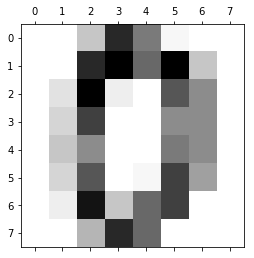

In [0]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[0], cmap="Greys")
plt.show()

In [0]:
digits.target[0]

0

In [0]:
# このデータセットを訓練データとテストデータに分ける
# データセットの’data’と’target’の前半分を訓練データとそれに対応する教師データ
# 後半分をテストデータとそれに対応する教師データにする

n=len(digits.data)*1//2 #データを半分にわける
X_training = digits.data[:n] #dataの前半分
Y_training = digits.target[:n] #targetの前半分
X_test = digits.data[n:] #dataの後半分
Y_test = digits.target[n:] #targetの後半分

In [0]:
# 変数に入れたデータをshapeメソッドで確認

print([i.shape for i in [X_training, Y_training, X_test, Y_test]])

[(898, 64), (898,), (899, 64), (899,)]


In [0]:
from sklearn import svm #svmモジュールをインポート
lng = svm.SVC(gamma=0.001) #学習器を作る
lng.fit(X_training, Y_training) #学習器に訓練データと教師データを渡す

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# テスト用の訓練データとテスト用の教師データを渡すと正答率を返す
print(lng.score(X_test, Y_test))

0.9688542825361512


In [0]:
# 学習器にpredict()メソッドを実行すると、次のようにテストデータの識別結果を numpy の配列で返す

predicted = lng.predict(X_test) #判別結果をNumpy配列で取り出す
predicted

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

In [0]:
# 比較演算子を使って、誤答の数の合計を調べる
(Y_test != predicted).sum() #教師データと一致しなかった数（誤答数）を合計

28

In [0]:
from sklearn import metrics
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


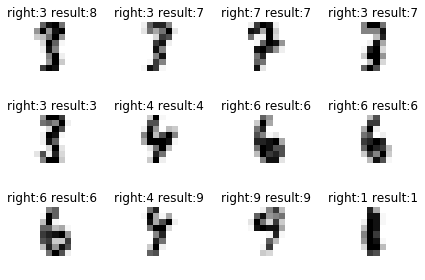

In [0]:
import matplotlib.pyplot as plt
imgs_yt_preds = list(zip(digits.images[n:], Y_test, predicted))
for index, (image, y_t, pred) in enumerate(imgs_yt_preds[704:716]):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.title(f'right:{y_t} result:{pred}', fontsize=12)
plt.show()
